# Programming Project #2: Image Quilting

## CS445: Computational Photography


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/cs445_projects/proj2/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .
import utils

In [ ]:
from utils import cut # default cut function for seam finding section

### Part I: Randomly Sampled Texture (10 pts)

In [ ]:
import IPython.display as display
from PIL import Image

In [ ]:
def quilt_random(sample, out_size, patch_size):
  """
  Randomly samples square patches of size patchsize from sample in order to create an output image of size outsize.

  :param sample: numpy.ndarray   The image you read from sample directory
  :param out_size: int            The width of the square output image
  :param patch_size: int          The width of the square sample patch
  :return: numpy.ndarray
  """
  sample_array = np.array(sample)

  sample_height = sample_array.shape[0]
  sample_width = sample_array.shape[1]

  output_image = np.zeros((out_size, out_size, 3), dtype=np.uint8)

  for i in range(0, out_size, patch_size):
    for j in range(0, out_size, patch_size):

      tl_x = np.random.randint(0, sample_width - patch_size)
      tl_y = np.random.randint(0, sample_height - patch_size)

      patch = sample_array[tl_y:tl_y+patch_size, tl_x:tl_x+patch_size]

      end_i = min(i + patch_size, out_size)
      end_j = min(j + patch_size, out_size)

      output_image[i:end_i, j:end_j] = patch[:end_i-i, :end_j-j]

  return Image.fromarray(output_image)








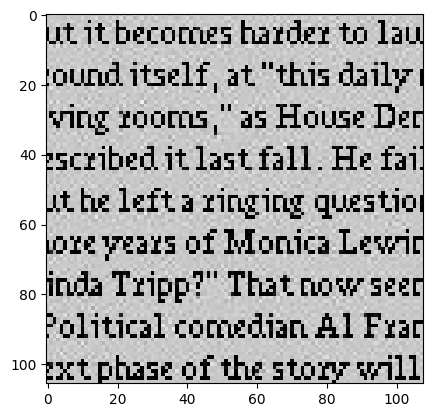

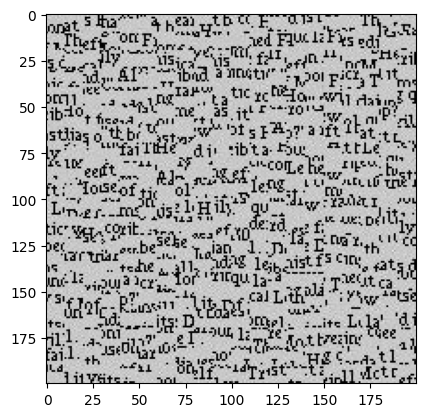

In [ ]:
sample_img_fn = 'samples/text_small.jpg' # feel free to change
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 200  # change these parameters as needed
patch_size = 10
res = quilt_random(sample_img, out_size, patch_size)
if res is not None:
    plt.imshow(res)

### Part II: Overlapping Patches (30 pts)

In [ ]:
from logging import exception

def ssd_patch(T, M, I, patch_size):

  ssd_cost = 0

  for c in range(I.shape[2]):
    T_c = T[:, :, c].astype(np.float32) / 255.0
    I_c = I[:, :, c].astype(np.float32) / 255.0

    ssd_cost += ((M*T_c)**2).sum() - 2 * cv2.filter2D(I_c, ddepth=-1, kernel = M*T_c) + cv2.filter2D(I_c ** 2, ddepth=-1, kernel=M)

  maximum_fill_value = np.finfo(ssd_cost.dtype).max

  ssd_cost[:patch_size,:] = maximum_fill_value
  ssd_cost[:,:patch_size] = maximum_fill_value
  ssd_cost[-patch_size:,:] = maximum_fill_value
  ssd_cost[:,-patch_size:] = maximum_fill_value

  return ssd_cost

def choose_sample(ssd_cost, tol):


  sorted_indices = np.argsort(ssd_cost.flatten(), None)
  tol_sorted_indices = sorted_indices[:tol]

  idx = np.random.choice(tol_sorted_indices)

  chosen_r, chosen_c = np.unravel_index(idx, ssd_cost.shape)

  return chosen_r, chosen_c

def quilt_simple(sample, out_size, patch_size, overlap, tol):
    """
    Randomly samples square patches of size patchsize from sample in order to create an output image of size outsize.
    Feel free to add function parameters
    :param sample: numpy.ndarray
    :param out_size: int
    :param patch_size: int
    :param overlap: int
    :param tol: float
    :return: numpy.ndarray
    """

    sample_array = np.array(sample)

    sample_height, sample_width = sample_array.shape[0], sample_array.shape[1]

    output_image = np.zeros((out_size, out_size, 3), dtype=np.uint8)

    random_x = np.random.randint(0, sample_width - patch_size)
    random_y = np.random.randint(0, sample_height - patch_size)

    first_patch = sample[random_y : random_y + patch_size, random_x : random_x + patch_size]
    output_image[0 : patch_size, 0 : patch_size] = first_patch

    for i in range(0, out_size, overlap):
        for j in range(0, out_size, overlap):
          if i == 0 and j == 0:
            continue
          else:

            # Get the template (The template is the patch in the current output image that is to be filled in )

            template = output_image[i : i + patch_size, j : j + patch_size]

            mask = np.zeros((template.shape[0], template.shape[1]))
            if i == 0:
              mask[:, :overlap] = 1  # horizontal
            elif j == 0:
              mask[:overlap, :] = 1  # vertical
            else:
              mask[:overlap, :] = 1
              mask[:, :overlap] = 1

            ssd_cost = ssd_patch(template, mask, sample, patch_size)

            chosen_r, chosen_c = choose_sample(ssd_cost, tol)

            chosen_r_start = chosen_r - (patch_size // 2)
            chosen_c_start = chosen_c - (patch_size // 2)

            patch = sample[chosen_r_start : chosen_r_start + patch_size, chosen_c_start : chosen_c_start + patch_size]

            try:
              output_image[i : i + patch_size, j : j + patch_size] = patch
            except:
              pass

    return Image.fromarray(output_image)




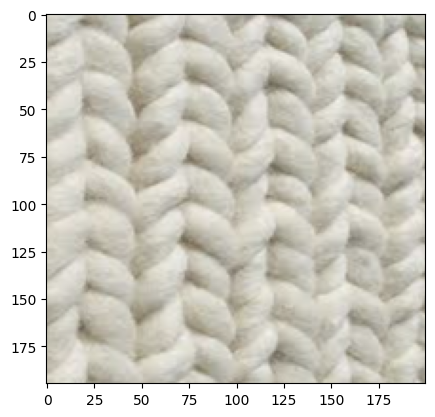

(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)
(195, 200, 3)
(20, 20, 3)
(20, 20)

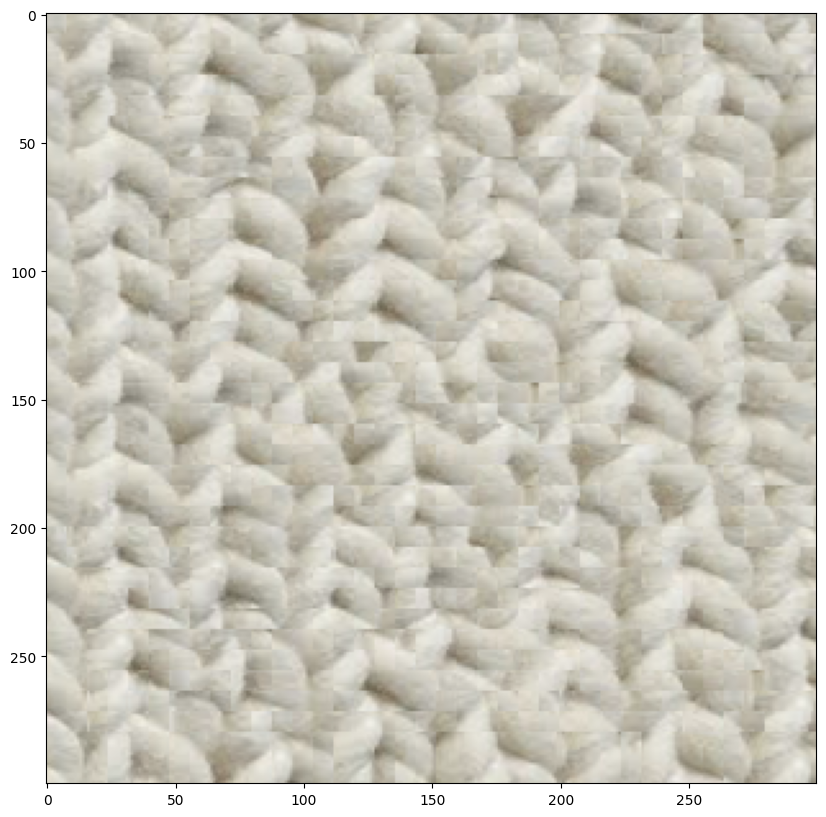

In [ ]:
sample_img_fn = 'samples/texture.png'
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 300  # change these parameters as needed
patch_size = 20
overlap = 8
tol = 3
res = quilt_simple(sample_img, out_size, patch_size, overlap, tol) #feel free to change parameters to get best results
if res is not None:
    plt.figure(figsize=(10,10))
    plt.imshow(res)

### Part III: Seam Finding (20 pts)


In [ ]:
# optional or use cut(err_patch) directly
def customized_cut(bndcost):
    pass

In [ ]:
def determine_ssd(img1, img2):
  ssd = 0

  for i in range(3):
    img1_c = img1[:, :, i].astype(np.float32) / 255.0
    img2_c = img2[:, :, i].astype(np.float32) / 255.0

    ssd += (pow(img1_c - img2_c, 2))
  return ssd

In [ ]:
def determine_mask(template, i, j, overlap):
  mask = np.zeros((template.shape[0], template.shape[1]))

  if i == 0:
    mask[:, :overlap] = 1  # horizontal overlap
  elif j == 0:
    mask[:overlap, :] = 1  # vertical overlap
  else:
    mask[:overlap, :] = 1  # vertical overlap
    mask[:, :overlap] = 1  # horizontal overlap

  return mask

In [ ]:
def quilt_cut(sample, out_size, patch_size, overlap, tol):
    """
    Samples square patches of size patchsize from sample using seam finding in order to create an output image of size outsize.
    Feel free to add function parameters
    :param sample: numpy.ndarray
    :param out_size: int
    :param patch_size: int
    :param overlap: int
    :param tol: float
    :return: numpy.ndarray
    """
    sample_array = np.array(sample)

    sample_height, sample_width = sample_array.shape[0], sample_array.shape[1]

    output_image = np.zeros((out_size, out_size, 3), dtype=np.uint8)

    random_x = np.random.randint(0, sample_width - patch_size)
    random_y = np.random.randint(0, sample_height - patch_size)

    first_patch = sample[random_y : random_y + patch_size, random_x : random_x + patch_size]
    output_image[0 : patch_size, 0 : patch_size] = first_patch


    for i in range(0, out_size, overlap):
        for j in range(0, out_size, overlap):
          if i == 0 and j == 0:
            continue
          else:
            # Get the template (The template is the patch in the current output image that is to be filled in )

            template = output_image[i : i + patch_size, j : j + patch_size]

            mask = determine_mask(template, i, j, overlap)

            ssd_cost = ssd_patch(template, mask, sample, patch_size)

            chosen_r, chosen_c = choose_sample(ssd_cost, tol)

            chosen_r_start = chosen_r - (patch_size // 2)
            chosen_c_start = chosen_c - (patch_size // 2)

            patch = sample[chosen_r_start : chosen_r_start + patch_size, chosen_c_start : chosen_c_start + patch_size]

            if output_image[i : i + patch_size, j : j + patch_size].shape != patch.shape:
              continue

            # <------------------- SEAM FINDING ------------------->

            output_patch = output_image[i : i + patch_size, j : j + patch_size].copy()

            cut_mask = None

            bnd_cost = determine_ssd(output_patch, patch)

            if i == 0:
              cut_mask = cut(bnd_cost.T).T
            elif j == 0:
              cut_mask = cut(bnd_cost)
            else:

              cut_mask_1 = cut(bnd_cost.T).T
              cut_mask_2 = cut(bnd_cost)

              cut_mask = np.logical_and(cut_mask_1, cut_mask_2)

            for channel in range(3):
                for r in range(patch_size):
                    for c in range(patch_size):
                        if cut_mask[r, c]:
                            output_image[i + r, j + c, channel] = patch[r, c, channel]

    return Image.fromarray(output_image)







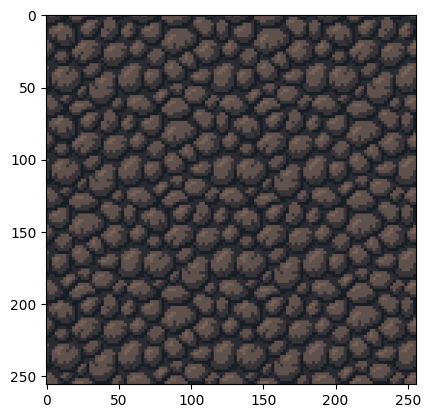

(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)
(256, 256, 3)
(35, 35, 3)
(35, 35)

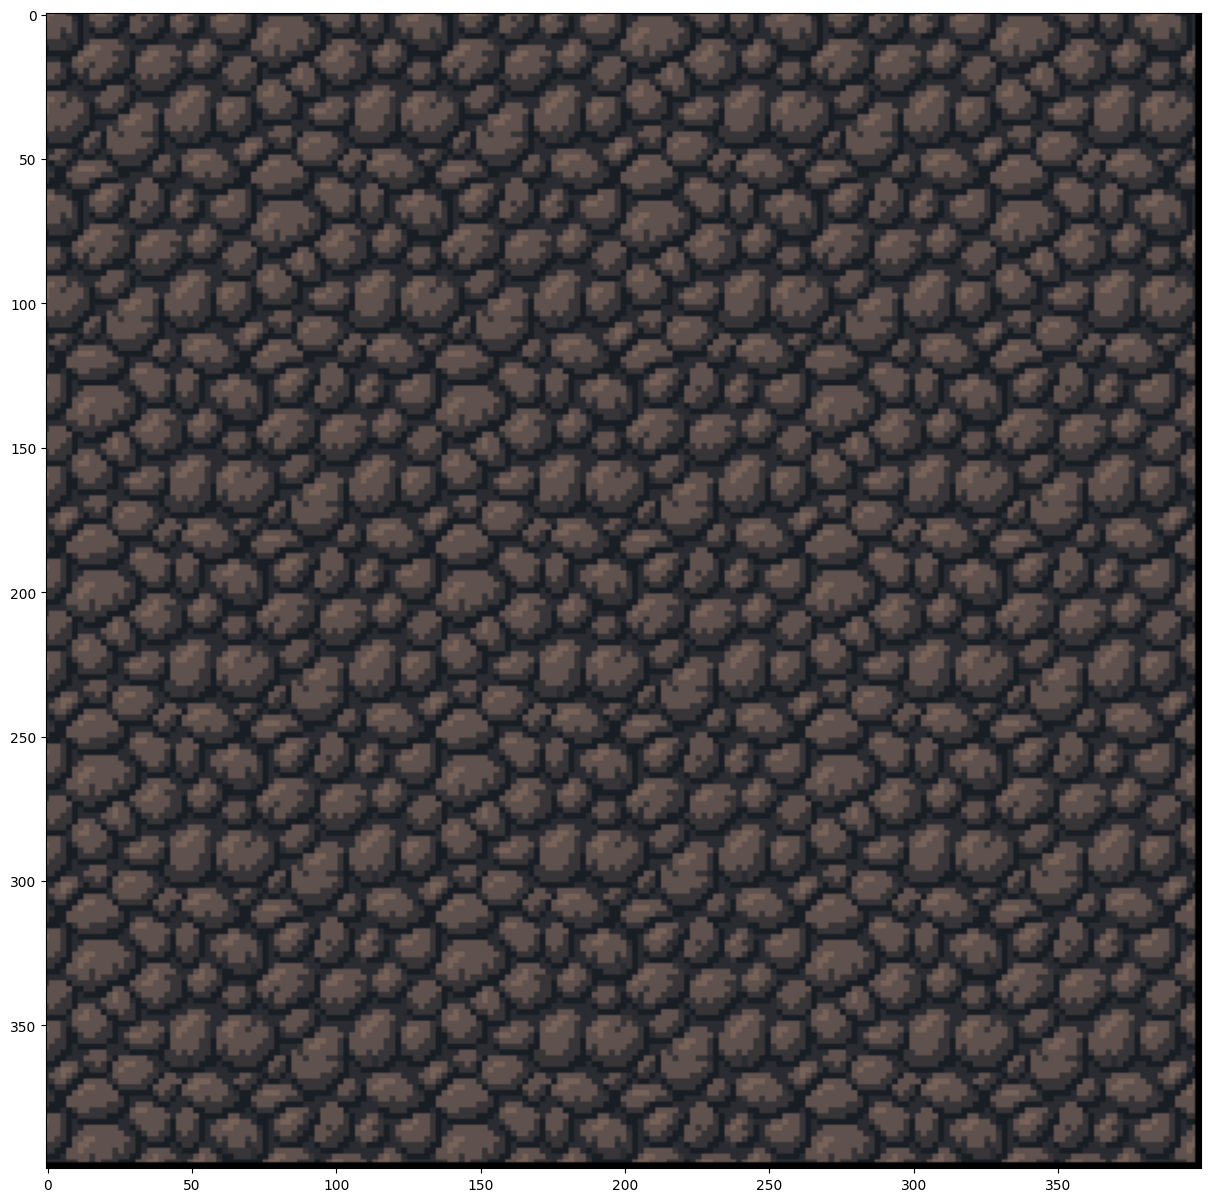

In [ ]:
sample_img_fn = 'samples/ground.png'
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 400  # change these parameters as needed
patch_size = 35
overlap = 11
tol = 1
res = quilt_cut(sample_img, out_size, patch_size, overlap, tol)
if res is not None:
    plt.figure(figsize=(15,15))
    plt.imshow(res)

### part IV: Texture Transfer (30 pts)

In [ ]:
def ssd_patch(T, M, I, patch_size):

  ssd_cost = 0


  for c in range(I.shape[2]):

    T_c = T[:, :, c].astype(np.float32) / 255.0
    I_c = I[:, :, c].astype(np.float32) / 255.0

    ssd_cost += ((M*T_c)**2).sum() - 2 * cv2.filter2D(I_c, ddepth=-1, kernel = M*T_c) + cv2.filter2D(I_c ** 2, ddepth=-1, kernel=M)

  maximum_fill_value = np.finfo(ssd_cost.dtype).max

  ssd_cost[:patch_size,:] = maximum_fill_value
  ssd_cost[:,:patch_size] = maximum_fill_value
  ssd_cost[-patch_size:,:] = maximum_fill_value
  ssd_cost[:,-patch_size:] = maximum_fill_value

  return ssd_cost

def choose_sample(ssd_cost, tol):

  sorted_indices = np.argsort(ssd_cost.flatten(), None)
  tol_sorted_indices = sorted_indices[:tol]

  idx = np.random.choice(tol_sorted_indices)

  chosen_r, chosen_c = np.unravel_index(idx, ssd_cost.shape)

  return chosen_r, chosen_c

In [ ]:
def texture_transfer(sample, patch_size, overlap, tol, guidance_im, alpha):
    """
    Samples square patches of size patchsize from sample using seam finding in order to create an output image of size outsize.
    Feel free to modify function parameters
    :param sample: numpy.ndarray
    :param patch_size: int
    :param overlap: int
    :param tol: float
    :param guidance_im: target overall appearance for the output
    :param alpha: float 0-1 for strength of target
    :return: numpy.ndarray
    """
    sample_array = np.array(sample)

    sample_height, sample_width = sample_array.shape[0], sample_array.shape[1]

    out_height = guidance_im.shape[0]
    out_width = guidance_im.shape[1]

    output_image = np.zeros((out_height, out_width, 3), dtype=np.uint8)

    random_x = np.random.randint(0, sample_width - patch_size)
    random_y = np.random.randint(0, sample_height - patch_size)

    first_patch = sample[random_y : random_y + patch_size, random_x : random_x + patch_size]
    output_image[0 : patch_size, 0 : patch_size] = first_patch

    for i in range(0, out_height, overlap):
      for j in range(0, out_width, overlap):
        if i == 0 and j == 0:
          continue

        output_template = output_image[i : i + patch_size, j : j + patch_size]
        guidance_template = guidance_im[i : i + patch_size, j : j + patch_size]

        mask = np.zeros((output_template.shape[0], output_template.shape[1]))

        if i == 0:
          mask[:, :overlap] = 1  # horizontal
        elif j == 0:
          mask[:overlap, :] = 1  # vertical
        else:
          mask[:overlap, :] = 1
          mask[:, :overlap] = 1

        ssd_overlap = ssd_patch(output_template, mask, sample, patch_size)
        ssd_transfer = ssd_patch(guidance_template, mask, sample, patch_size)

        texture_cost = (alpha) * ssd_overlap + (1 - alpha) * ssd_transfer

        chosen_r, chosen_c = choose_sample(texture_cost, tol)

        chosen_r_start = chosen_r - (patch_size // 2)
        chosen_c_start = chosen_c - (patch_size // 2)

        patch = sample[chosen_r_start : chosen_r_start + patch_size, chosen_c_start : chosen_c_start + patch_size]

        if output_image[i : i + patch_size, j : j + patch_size].shape != patch.shape:
            continue

        # <------------------- SEAM FINDING ------------------->

        output_patch = output_image[i : i + patch_size, j : j + patch_size].copy()

        cut_mask = None

        bnd_cost = determine_ssd(output_patch, patch)

        if i == 0:
          cut_mask = cut(bnd_cost.T).T
        elif j == 0:
          cut_mask = cut(bnd_cost)
        else:

          cut_mask_1 = cut(bnd_cost.T).T
          cut_mask_2 = cut(bnd_cost)


          cut_mask = np.logical_and(cut_mask_1, cut_mask_2)


        for channel in range(3):
            for r in range(patch_size):
                for c in range(patch_size):
                    if cut_mask[r, c]:
                        output_image[i + r, j + c, channel] = patch[r, c, channel]

    return Image.fromarray(output_image)


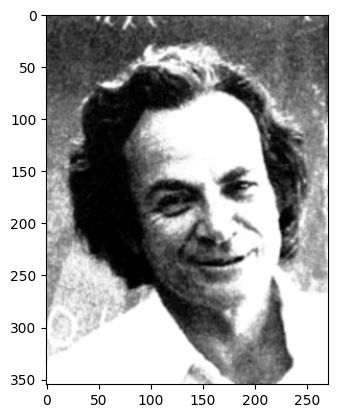

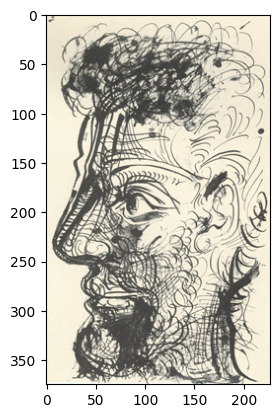

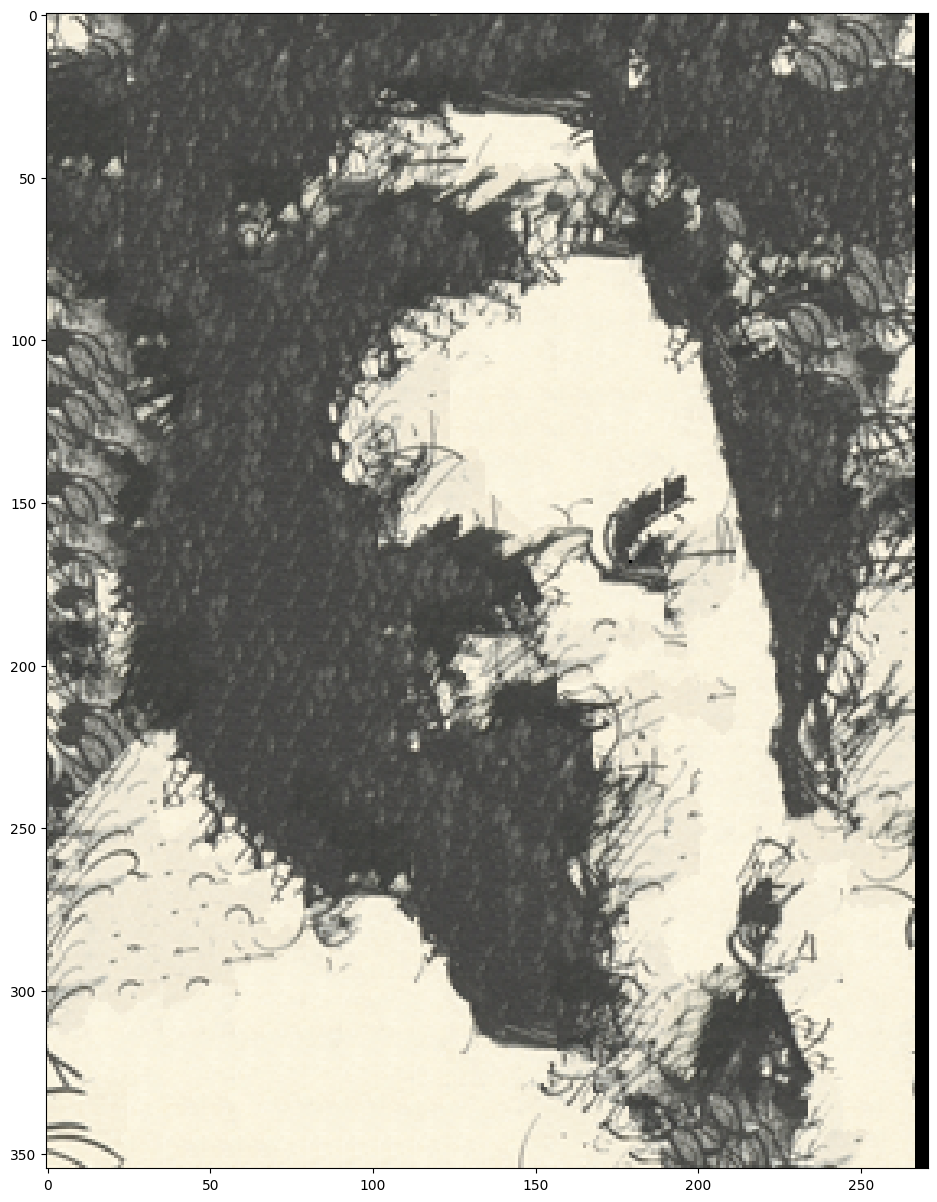

In [ ]:
# load/process appropriate input texture and guidance images

guidance_img_fn = 'samples/feynman.tiff'
guidance_img = cv2.cvtColor(cv2.imread(guidance_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(guidance_img)
plt.show()

texture_img_fn = 'samples/sketch.tiff'
texture_img = cv2.cvtColor(cv2.imread(texture_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(texture_img)
plt.show()

patch_size = 25
overlap = 11
tol = 3
alpha = 0.4
res = texture_transfer(texture_img, patch_size, overlap, tol, guidance_img, alpha)
if res is not None:
    plt.figure(figsize=(15,15))
    plt.imshow(res)


### Bells & Whistles

(15 pts) Implement the iterative texture transfer method described in the paper. Compare to the non-iterative method for two examples.

In [ ]:
def iterative_texture_transfer(sample, patch_size, overlap, tol, guidance_im, N):

    sample_array = np.array(sample)

    sample_height, sample_width = sample_array.shape[0], sample_array.shape[1]

    out_height = guidance_im.shape[0]
    out_width = guidance_im.shape[1]

    output_image = np.zeros((out_height, out_width, 3), dtype=np.uint8)

    random_x = np.random.randint(0, sample_width - patch_size)
    random_y = np.random.randint(0, sample_height - patch_size)

    first_patch = sample[random_y : random_y + patch_size, random_x : random_x + patch_size]
    output_image[0 : patch_size, 0 : patch_size] = first_patch

    for n in range(N):
      for i in range(0, out_height, overlap):
        for j in range(0, out_width, overlap):
          if i == 0 and j == 0:
            continue

          a = float(0.8 * ((n - 1)/(N-1)) + 0.1)
          p_size = int(((1 - (1/N)*n)) * patch_size)

          output_template = output_image[i : i + p_size, j : j + p_size]
          guidance_template = guidance_im[i : i + p_size, j : j + p_size]

          mask = np.zeros((output_template.shape[0], output_template.shape[1]))

          if i == 0:
            mask[:, :overlap] = 1  # horizontal
          elif j == 0:
            mask[:overlap, :] = 1  # vertical
          else:
            mask[:overlap, :] = 1
            mask[:, :overlap] = 1

          ssd_overlap = ssd_patch(output_template, mask, sample, p_size)
          ssd_transfer = ssd_patch(guidance_template, mask, sample, p_size)

          texture_cost = (a) * ssd_overlap + (1 - a) * ssd_transfer

          chosen_r, chosen_c = choose_sample(texture_cost, tol)

          chosen_r_start = chosen_r - (p_size // 2)
          chosen_c_start = chosen_c - (p_size // 2)

          patch = sample[chosen_r_start : chosen_r_start + p_size, chosen_c_start : chosen_c_start + p_size]

          if output_image[i : i + p_size, j : j + p_size].shape != patch.shape:
              continue

          # <------------------- SEAM FINDING ------------------->

          output_patch = output_image[i : i + p_size, j : j + p_size].copy()

          cut_mask = None

          bnd_cost = determine_ssd(output_patch, patch)

          if i == 0:
            cut_mask = cut(bnd_cost.T).T
          elif j == 0:
            cut_mask = cut(bnd_cost)
          else:

            cut_mask_1 = cut(bnd_cost.T).T
            cut_mask_2 = cut(bnd_cost)


            cut_mask = np.logical_and(cut_mask_1, cut_mask_2)


          for channel in range(3):
              for r in range(p_size):
                  for c in range(p_size):
                      if cut_mask[r, c]:
                          output_image[i + r, j + c, channel] = patch[r, c, channel]

    return Image.fromarray(output_image)

(up to 20 pts) Use a combination of texture transfer and blending to create a face-in-toast image like the one on top. To get full points, you must use some type of blending, such as feathering or Laplacian pyramid blending.

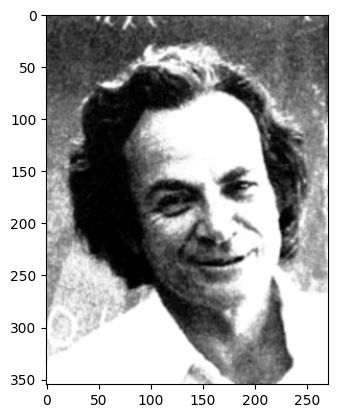

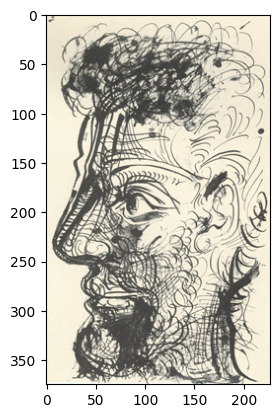

<ipython-input-79-758984338676>:45: RuntimeWarning: overflow encountered in multiply
  texture_cost = (a) * ssd_overlap + (1 - a) * ssd_transfer


In [ ]:
# guidance_img_fn = 'samples/bron.jpeg'
guidance_img_fn = 'samples/feynman.tiff'
guidance_img = cv2.cvtColor(cv2.imread(guidance_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(guidance_img)
plt.show()

# texture_img_fn = 'samples/grass_strips.jpg'
texture_img_fn = 'samples/sketch.tiff'
texture_img = cv2.cvtColor(cv2.imread(texture_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(texture_img)
plt.show()

patch_size = 20
overlap = 8
tol = 3
N = 5
res = iterative_texture_transfer(texture_img, patch_size, overlap, tol, guidance_img, N)
if res is not None:
    plt.figure(figsize=(15,15))
    plt.imshow(res)

(up to 40 pts) Extend your method to fill holes of arbitrary shape for image completion. In this case, patches are drawn from other parts of the target image. For the full 40 pts, you should implement a smart priority function (e.g., similar to Criminisi et al.).